# Example 0: The Simplest Neuroptimiser
This example demonstrates how to use the Neuroptimiser library to solve a dummy optimisation problem.

## 1. Setup
Import minimal necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from neuroptimiser import NeurOptimiser

## 2. Quick problem and optimiser setup
We define a simple optimisation problem with a fitness function and bounds.

In [2]:
problem_function    = lambda x: np.linalg.norm(x)
problem_bounds      = np.array([[-5.0, 5.0], [-5.0, 5.0]])

Then, we instantiate the Neuroptimiser with the default configurations.

In [3]:
optimiser = NeurOptimiser()
#optimiser = NeurOptimiser(core_params={"hs_operator": "directional", "hs_variant": "pbest"})
# selector_params={"sel_mode": "greedy"}

In [4]:
# Show the overall configuration parameters of the optimiser
print("DEFAULT CONFIG PARAMS:\n", optimiser.config_params, "\n")
print("DEFAULT CORE PARAMS:\n", optimiser.core_params)
print("\nDEFAULT SELECTOR PARAMS:\n", optimiser.selector_params, "\n")

DEFAULT CONFIG PARAMS:
 {'unit_topology': '2dr', 'spiking_core': 'TwoDimSpikingCore', 'neuron_topology': '2dr', 'num_agents': 10, 'num_iterations': 300, 'num_neighbours': 1, 'function': None, 'search_space': array([[-1,  1],
       [-1,  1]]), 'seed': 69, 'num_dimensions': 2, 'core_params': {}} 

DEFAULT CORE PARAMS:
 [{'thr_min': 1e-06, 'name': 'linear', 'ref_mode': 'pgn', 'hs_operator': 'differential', 'spk_q_ord': 2, 'spk_cond': 'l1', 'alpha': 1.0, 'thr_alpha': 1.0, 'is_bounded': False, 'seed': None, 'hs_variant': 'rand', 'spk_alpha': 0.25, 'spk_weights': [0.5, 0.5], 'max_steps': 100, 'approx': 'rk4', 'coeffs': 'random', 'thr_k': 0.05, 'thr_max': 1.0, 'dt': 0.01, 'noise_std': 0.1, 'thr_mode': 'diff_pg'}, {'thr_min': 1e-06, 'name': 'linear', 'ref_mode': 'pgn', 'hs_operator': 'differential', 'spk_q_ord': 2, 'spk_cond': 'l1', 'alpha': 1.0, 'thr_alpha': 1.0, 'is_bounded': False, 'seed': None, 'hs_variant': 'rand', 'spk_alpha': 0.25, 'spk_weights': [0.5, 0.5], 'max_steps': 100, 'approx':

## 3. Optimisation process
We proceed to solve the optimisation problem using the `solve` method of the `NeurOptimiser` process. In this example, we enable the debug mode to get more detailed output during the optimisation process.

In [5]:
optimiser.solve(
    obj_func=problem_function,
    search_space=problem_bounds,
    debug_mode=True,
    num_iterations=1000,
)

[neuropt:log] Debug mode is enabled. Monitoring will be activated.
[neuropt:log] Parameters are set up.
[neuropt:log] Initial positions and topologies are set up.
[neuropt:log] Tensor contraction layer, neighbourhood manager, and high-level selection unit are created.
[neuropt:log] Population of nheuristic units is created.
[neuropt:log] Connections between nheuristic units and auxiliary processes are established.
[neuropt:log] Monitors are set up.
[neuropt:log] Starting simulation with 1000 iterations...
... step: 0, best fitness: 2.0665700435638428
... step: 100, best fitness: 0.020449010655283928
... step: 200, best fitness: 0.013391985557973385
... step: 300, best fitness: 0.013391985557973385
... step: 400, best fitness: 0.013391985557973385
... step: 500, best fitness: 0.013391985557973385
... step: 600, best fitness: 0.013391985557973385
... step: 700, best fitness: 0.013391985557973385
... step: 800, best fitness: 0.013391985557973385
... step: 900, best fitness: 0.013391985557

(array([1.33916992e-02, 1.92844823e-05]), 0.013391985557973385)

## (Optional) 4. Results processing and visualisation
We process the results obtained from the optimiser and visualise the absolute error in fitness values over the optimisation steps.

In [6]:
# Recover the results from the optimiser
fp              = optimiser.results["fp"]
fg              = optimiser.results["fg"]
positions       = np.array(optimiser.results["p"])
best_position   = np.array(optimiser.results["g"])
v1              = np.array(optimiser.results["v1"])
v2              = np.array(optimiser.results["v2"])

# Calculate the absolute error in fitness values
efp             = np.abs(np.array(fp))
efg             = np.abs(np.array(fg))

# Convert the spikes to integer type
spikes          = np.array(optimiser.results["s"]).astype(int)

# Print some minimal information about the results
print(f"fg: {fg[-1][0]:.4f}, f*: {0.0:.4f}, error: {efg[-1][0]:.4e}")
print(f"norm2(g - x*): {np.linalg.norm(best_position[-1]):.4e}")
print(f"{v1.min():.4f} <= v1 <= {v1.max():.4f}")
print(f"{v2.min():.4f} <= v2 <= {v2.max():.4f}")

fg: 0.0134, f*: 0.0000, error: 1.3392e-02
norm2(g - x*): 1.3392e-02
-0.7797 <= v1 <= 1.2422
-0.8562 <= v2 <= 0.9703


In [7]:
num_steps, num_agents, num_dimensions  = positions.shape
width = 6.9
height = width * 0.618

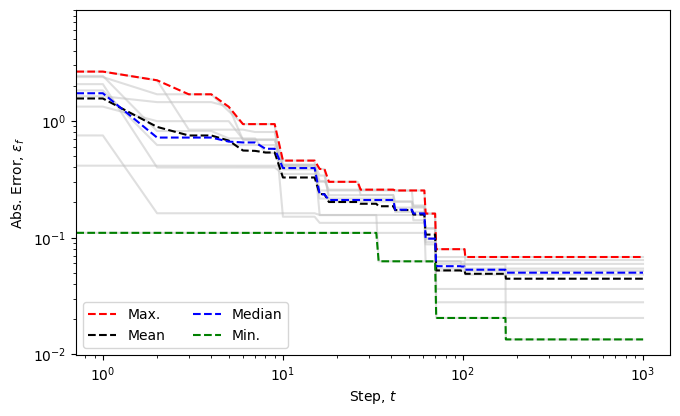

In [8]:
fig, ax = plt.subplots(figsize=(width, height))

plt.plot(efp, color="silver", alpha=0.5)
plt.plot(np.max(efp, axis=1), '--', color="red", label=r"Max.")
plt.plot(np.average(efp, axis=1), '--', color="black", label=r"Mean")
plt.plot(np.median(efp, axis=1), '--', color="blue", label=r"Median")
plt.plot(efg, '--', color="green", label=r"Min.")

plt.xlabel(r"Step, $t$")
plt.ylabel(r"Abs. Error, $\varepsilon_f$")

lgd = plt.legend(ncol=2, loc="lower left")

plt.xscale("log")
plt.yscale("log")

ax.patch.set_alpha(0)
fig.tight_layout()

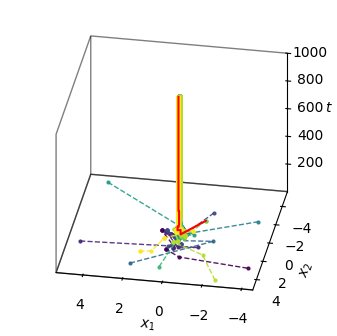

In [9]:
fig = plt.figure(figsize=(width/2, width/2))
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('ortho')

cmap = plt.get_cmap('viridis', num_agents)
color = cmap(np.linspace(0, 1, num_agents))

steps = np.arange(optimiser._num_iterations) + 1

for agent, c in enumerate(color):
    ax.plot3D(positions[:, agent, 0], positions[:, agent, 1], steps,
              "--o", color=c, alpha=0.9, markersize=2, linewidth=1,
              label=f"Agent {agent}")

ax.plot3D(best_position[:, 0], best_position[:, 1], steps,
          "-", color="red", markersize=2,  linewidth=1.5,
          label="Best position")

for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.pane.set_edgecolor('black')
    axis.pane.set_linewidth(1.0)

# ax.viewfig, _init(elev=35, azim=135)
ax.view_init(elev=30, azim=100)
# ax.legend()
ax.set_xlabel(r"$x_1$", labelpad=1)
ax.set_ylabel(r"$x_2$", labelpad=1)
ax.set_zlabel(r"$t$", labelpad=0)
ax.set_box_aspect([1, 1, 0.8])

ax.set_zlim(1, num_steps)

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.patch.set_alpha(0)
fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)

ax.patch.set_alpha(0)
fig.tight_layout()
plt.show()

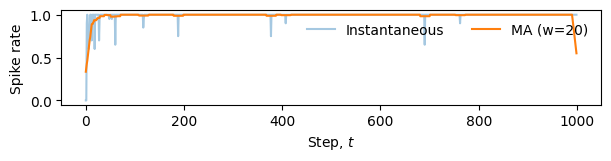

In [10]:
# Spike rate analysis
window = max(5, num_steps // 50)  # choose a small window
# mean activity per step (across agents and dims)
rate = spikes.mean(axis=(1, 2)).astype(float)

# simple moving average
kernel = np.ones(window) / window
rate_ma = np.convolve(rate, kernel, mode='same')

fig, ax = plt.subplots(figsize=(width*0.9, height*0.4))
ax.plot(np.arange(num_steps), rate, alpha=0.4, label="Instantaneous")
ax.plot(np.arange(num_steps), rate_ma, linewidth=1.5, label=f"MA (w={window})")

ax.set_xlabel(r"Step, $t$")
ax.set_ylabel(r"Spike rate")
ax.legend(loc="upper right", ncol=2, frameon=False)

ax.patch.set_alpha(0)
fig.tight_layout()
plt.show()